<a href="https://colab.research.google.com/github/pulkitkinra01/ImageCaptioning/blob/main/run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
# https://github.com/pulkitkinra01/ImageCaptioning.git

# Clone the entire repo.
!git clone -l -s https://github.com/pulkitkinra01/ImageCaptioning.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 8104, done.
remote: Counting objects: 100% (8104/8104), done.
remote: Compressing objects: 100% (8100/8100), done.
remote: Total 8104 (delta 4), reused 8104 (delta 4), pack-reused 0
Receiving objects: 100% (8104/8104), 1.03 GiB | 41.71 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Checking out files: 100% (8100/8100), done.
/content/cloned-repo
Data


In [17]:
import random, os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# load the file containing all of the captions into a single long string
caption_file = "Data/Flickr8k_text/Flickr8k.token.txt"
def load_captions (filename):
  with open(filename, "r") as fp:
    # Read all text in the file
    text = fp.read()
    return (text)

In [4]:
def captions_dict (text):
  dict = {}
  
  # Make a List of each line in the file
  lines = text.split ('\n')
  for line in lines:
    
    # Split into the <image_data> and <caption>
    line_split = line.split ('\t')
    if (len(line_split) != 2):
      # Added this check because dataset contains some blank lines
      continue
    else:
      image_data, caption = line_split

    # Split into <image_file> and <caption_idx>
    image_file, caption_idx = image_data.split ('#')
    # Split the <image_file> into <image_name>.jpg
    image_name = image_file.split ('.')[0]
    
    # If this is the first caption for this image, create a new list for that
    # image and add the caption to it. Otherwise append the caption to the 
    # existing list
    if (int(caption_idx) == 0):
      dict [image_name] = [caption]
    else:
      dict [image_name].append (caption)
  
  return (dict)

doc = load_captions (caption_file)
image_dict = captions_dict (doc)

In [15]:
image_dict['2096771662_984441d20d']

['a man looks through his binoculars while another man holds a drink .',
 'A man with a thermos is standing next to a man who is gazing through binoculars .',
 'Two men are standing together while one looks through binoculars .',
 'Two men look out as one is holding binoculars .',
 'two people standing next to each other with mountains in the distance .']

3729525173_7f984ed776.jpg


['A lady sitting on a front porch reading a book .',
 'A person sits at a doorstep and reads a book .',
 'A woman is reading literature and sitting on the front stoop of a building .',
 'A woman sits and reads in the stoop of a wooden door .',
 'A woman sits and reads on the front stoop of her building .']

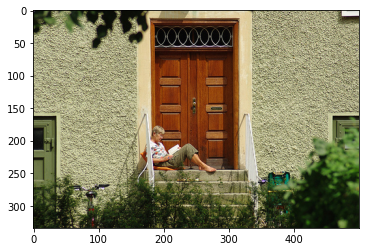

In [31]:
sample_file  = random.choice( os.listdir('Data/Flicker8k_Dataset') )
img = plt.imread('Data/Flicker8k_Dataset/' + sample_file)
plt.imshow( img )
print( sample_file )
image_dict[ sample_file.replace('.jpg','') ]